In [148]:
import matplotlib.pyplot as plt
import numpy as np
from helpers_plot import initPlot, finalizePlot

# Comparison To BSKIT

This notebook runs the Bispectrum extractor on the example set and creates comparison plots to `bskit`.



## Run BiG

First: measure the bispectra in the example data in `examples/`. 

In [143]:
# Run BiG

!python ../scripts/runBispectrumExtractor.py --L 1000 --Nmesh 512 --Nkbins 19 --kmin 0.01 --kmax 1.91 --mode equilateral --outfn ../tests/testRun_output --infiles ../tests/testRun_input.dat


Finished reading CMD line arguments
Settings:
Boxsize: 1000.0 Mpc/h
Grid Cells (1D): 512
ks: [0.01 0.11 0.21 0.31 0.41 0.51 0.61 0.71 0.81 0.91 1.01 1.11 1.21 1.31
 1.41 1.51 1.61 1.71 1.81]
Triangles: equilateral
Reading density files from ../tests/testRun_input.dat
Writing output to ../tests/testRun_output
Setting Settings
Creating k-mesh
Finished initialization BispectrumExtractor
Finished calculating bispectrum norm
Calculating bispectrum for ../examples/test_grid_512_1.bigfile/

Doing Fourier Transformation of density field
Doing Bispec calculation
Finished bispectrum calculation
Written output to ../tests/testRun_outputtest_grid_512_1.dat
Calculating bispectrum for ../examples/test_grid_512_2.bigfile/
Doing Fourier Transformation of density field
Doing Bispec calculation
Finished bispectrum calculation
Written output to ../tests/testRun_outputtest_grid_512_2.dat


## Load Results

Second, load the results from `BSkit` and `BiG`

In [133]:
# Load BSKiT Results

bskit_results_1=np.loadtxt("ComparisonDataBSKit/test_grid_512_1_bs_kf_3kf_3lowbins_slow.dat")
bskit_results_2=np.loadtxt("ComparisonDataBSKit/test_grid_512_2_bs_kf_3kf_3lowbins_slow.dat")

bskit_k_1=0.5*(bskit_results_1[:,4]+bskit_results_1[:,5])
bskit_Bk_1=bskit_results_1[:,10]

bskit_k_2=0.5*(bskit_results_2[:,4]+bskit_results_2[:,5])
bskit_Bk_2=bskit_results_2[:,10]

In [134]:
# Load BiG Results

big_results_1=np.loadtxt("testRun_outputtest_grid_512_1.dat")
big_results_2=np.loadtxt("testRun_outputtest_grid_512_2.dat")

big_k_1=big_results_1[:,0]
big_Bk_1=big_results_1[:,5]

big_k_2=big_results_2[:,0]
big_Bk_2=big_results_2[:,5]

## Create Plots

Now do plots.

In [165]:
# To make pretty plots
initPlot(labelsize=14, titlesize=14, legendsize=14, usetex=True, fontfamily='sans-serif')


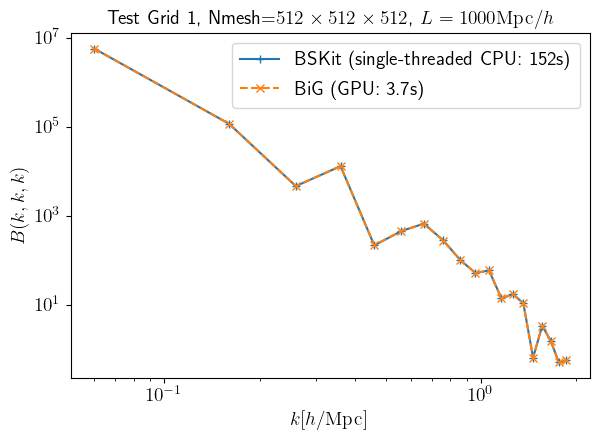

In [163]:
# Plot 

fig, ax=plt.subplots()
ax.set_title(r"Test Grid 1, Nmesh=$512 \times 512 \times 512$, $L=1000 \mathrm{Mpc}/h$ ")
ax.loglog()
ax.plot(bskit_k_1, np.abs(bskit_Bk_1), ls='-', marker='+', label='BSKit (single-threaded CPU: 152s)')

ax.plot(big_k_1, np.abs(big_Bk_1), ls='--', marker='x', label='BiG (GPU: 3.7s)')
ax.set_xlabel(r"$k [h/\mathrm{Mpc}]$")
ax.set_ylabel(r"$B(k,k,k)$")
finalizePlot(ax, outputFn="Testgrid1.png")


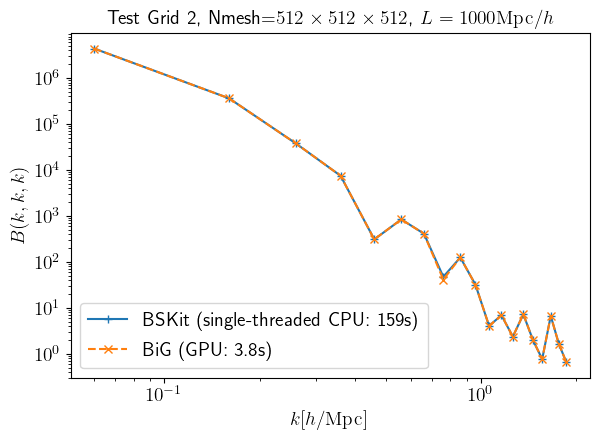

In [164]:
fig, ax=plt.subplots()
ax.set_title(r"Test Grid 2, Nmesh=$512 \times 512 \times 512$, $L=1000 \mathrm{Mpc}/h$ ")
ax.loglog()
ax.plot(bskit_k_2, np.abs(bskit_Bk_2), ls='-', marker='+', label='BSKit (single-threaded CPU: 159s)')

ax.plot(big_k_2, np.abs(big_Bk_2), ls='--', marker='x', label='BiG (GPU: 3.8s)')
ax.set_xlabel(r"$k [h/\mathrm{Mpc}]$")
ax.set_ylabel(r"$B(k,k,k)$")
finalizePlot(ax, outputFn="Testgrid2.png")